In [1]:
import numpy as np
import pylab as pl
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['SimHei']

In [2]:
import scipy
scipy.__version__#显示scipy版本

'1.7.2'

In [4]:
from scipy import constants as C
print(C.c)#真空中的光速
print(C.h)#普朗克常量
#1英里等于多少米，一英寸等于多少米，一克等于多少千克，一磅等于多少千克
print(C.mile)
print(C.inch)
print(C.gram)
print(C.pound)

299792458.0
6.62607015e-34
1609.3439999999998
0.0254
0.001
0.45359236999999997


In [5]:
import scipy.special as S
print(1+1e-20)
print(np.log(1+1e-20))
print(S.log1p(1e-20))

1.0
0.0
1e-20


In [8]:
m=np.linspace(0.1,0.9,4)
u = np.linspace(-10,10,200)
results=S.ellipj(u[:,None],m[None,:])
print([y.shape for y in results])

[(200, 4), (200, 4), (200, 4), (200, 4)]


C:\Users\frost\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


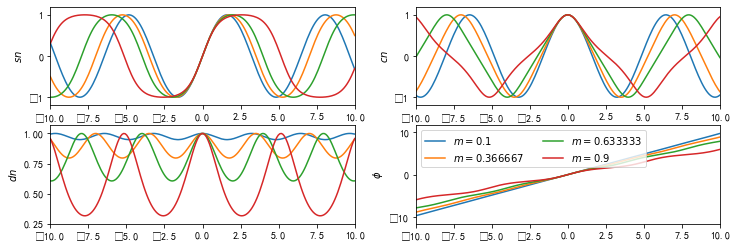

In [9]:
#%figonly=使用广播计算得到的`ellipj()`返回值
fig, axes = pl.subplots(2, 2, figsize=(12, 4))
labels = ["$sn$", "$cn$", "$dn$", "$\phi$"]
for ax, y, label in zip(axes.ravel(), results, labels):
    ax.plot(u, y)
    ax.set_ylabel(label)
    ax.margins(0, 0.1)
    
axes[1, 1].legend(["$m={:g}$".format(m_) for m_ in m], loc="best", ncol=2);

## 拟合与优化-optimize

### 非线性方程组求解

In [10]:
from math import sin,cos
from scipy import optimize
def f(x):
    x0,x1,x2=x.tolist()
    return[
        5*x1+3,
        4*x0*x0-2*sin(x1*x2),
        x1*x2-1.5
    ]

#f计算方程组的误差，[1,1,1]是未知数的初始值
result=optimize.fsolve(f,[1,1,1])
print(result)
print(f(result))

[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]
